# Calibration

In [1]:
%matplotlib notebook

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime

## Data

### VMM data

In [3]:
df = pd.read_excel("../01-data/external/NO2_apr_mei_2016_notval.xlsx", na_values=[-9999])

In [4]:
df.head()

,date,time,42R801,42R802,42R803,42R805,42R815,42R817,42M802,40AL01
0,20160401,01:00:00,19.5,14.5,14.0,16.0,30.0,23.0,22.0,15.0
1,20160401,02:00:00,19.5,14.0,15.0,16.5,28.0,23.5,20.0,16.0
2,20160401,03:00:00,22.0,16.5,17.0,18.5,14.0,36.5,21.5,14.0
3,20160401,04:00:00,33.0,27.0,30.0,32.5,22.0,56.0,46.0,22.0
4,20160401,05:00:00,50.0,46.0,49.0,54.5,37.0,67.0,58.5,50.5


Clean up date and time columns:

In [5]:
df['date'] = pd.to_datetime(df['date'], format="%Y%m%d")
mask = df['time'] == datetime.datetime(1900, 1, 1, 0, 0)
df.loc[mask, 'date'] += pd.Timedelta("1 day")
df.loc[mask, 'time'] = datetime.time(0, 0)
df['datetime'] = df['date'] + pd.to_timedelta(df.time.astype(str))
df = df.set_index('datetime')
df = df.drop(['date', 'time'], axis=1)

In [7]:
df.head()

,42R801,42R802,42R803,42R805,42R815,42R817,42M802,40AL01
datetime,,,,,,,,
2016-04-01 01:00:00,19.5,14.5,14.0,16.0,30.0,23.0,22.0,15.0
2016-04-01 02:00:00,19.5,14.0,15.0,16.5,28.0,23.5,20.0,16.0
2016-04-01 03:00:00,22.0,16.5,17.0,18.5,14.0,36.5,21.5,14.0
2016-04-01 04:00:00,33.0,27.0,30.0,32.5,22.0,56.0,46.0,22.0
2016-04-01 05:00:00,50.0,46.0,49.0,54.5,37.0,67.0,58.5,50.5


<IPython.core.display.Javascript object>


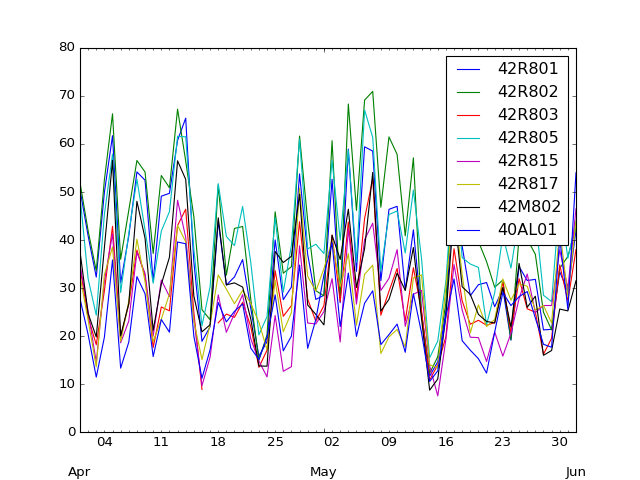

In [8]:
df.resample('D').mean().plot()

In [9]:
df["2016-04-28":"2016-05-27"].mean()

42R801    35.471616
42R802    42.593750
42R803    28.780142
42R805    40.865357
42R815    26.384835
42R817    28.575931
42M802    30.255334
40AL01    23.450714
dtype: float64

### CurieuzeNeuzen data

## Comparison

In [58]:
VMM = df["2016-04-28":"2016-05-27"].mean()

In [69]:
tubes = VMM + np.random.randn(len(VMM)) * 5 + 3

In [70]:
data = pd.DataFrame({'vmm ref': VMM, 'passive': tubes})

In [71]:
data

,passive,vmm ref
42R801,32.574546,35.471616
42R802,48.731090,42.593750
42R803,26.826888,28.780142
42R805,44.761615,40.865357
42R815,35.245342,26.384835
42R817,39.113663,28.575931
42M802,28.392697,30.255334
40AL01,32.032098,23.450714


<IPython.core.display.Javascript object>


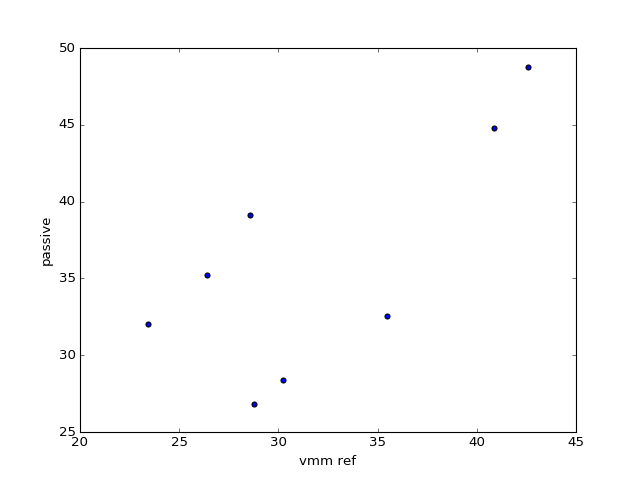

In [72]:
data.plot(x='vmm ref', y='passive', kind='scatter')